In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from qsa_pwfa.simulation import Simulation

In [2]:
# Beam 
n_b = 5 
R_b = 0.1

ksi0 = 5
R_xi = 1

# plasma
L_xi = 12
L_r = 2

# grid
N_xi = 512
N_r = 512
#Nr_loc = 64


sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r)
sim.init_beam(n_b, R_b, ksi0, R_xi)

In [3]:
r_xi = np.zeros((sim.N_xi, sim.N_r))
n_xi = np.zeros((sim.N_xi, sim.N_r))

# N_xi = 100

for i_xi in range(N_xi):
    r_xi[i_xi] = sim.r
    n_xi[i_xi] = 1/(1-sim.v_z)
    sim.advance_xi(i_xi, correct_Psi=True)

<IPython.core.display.Javascript object>


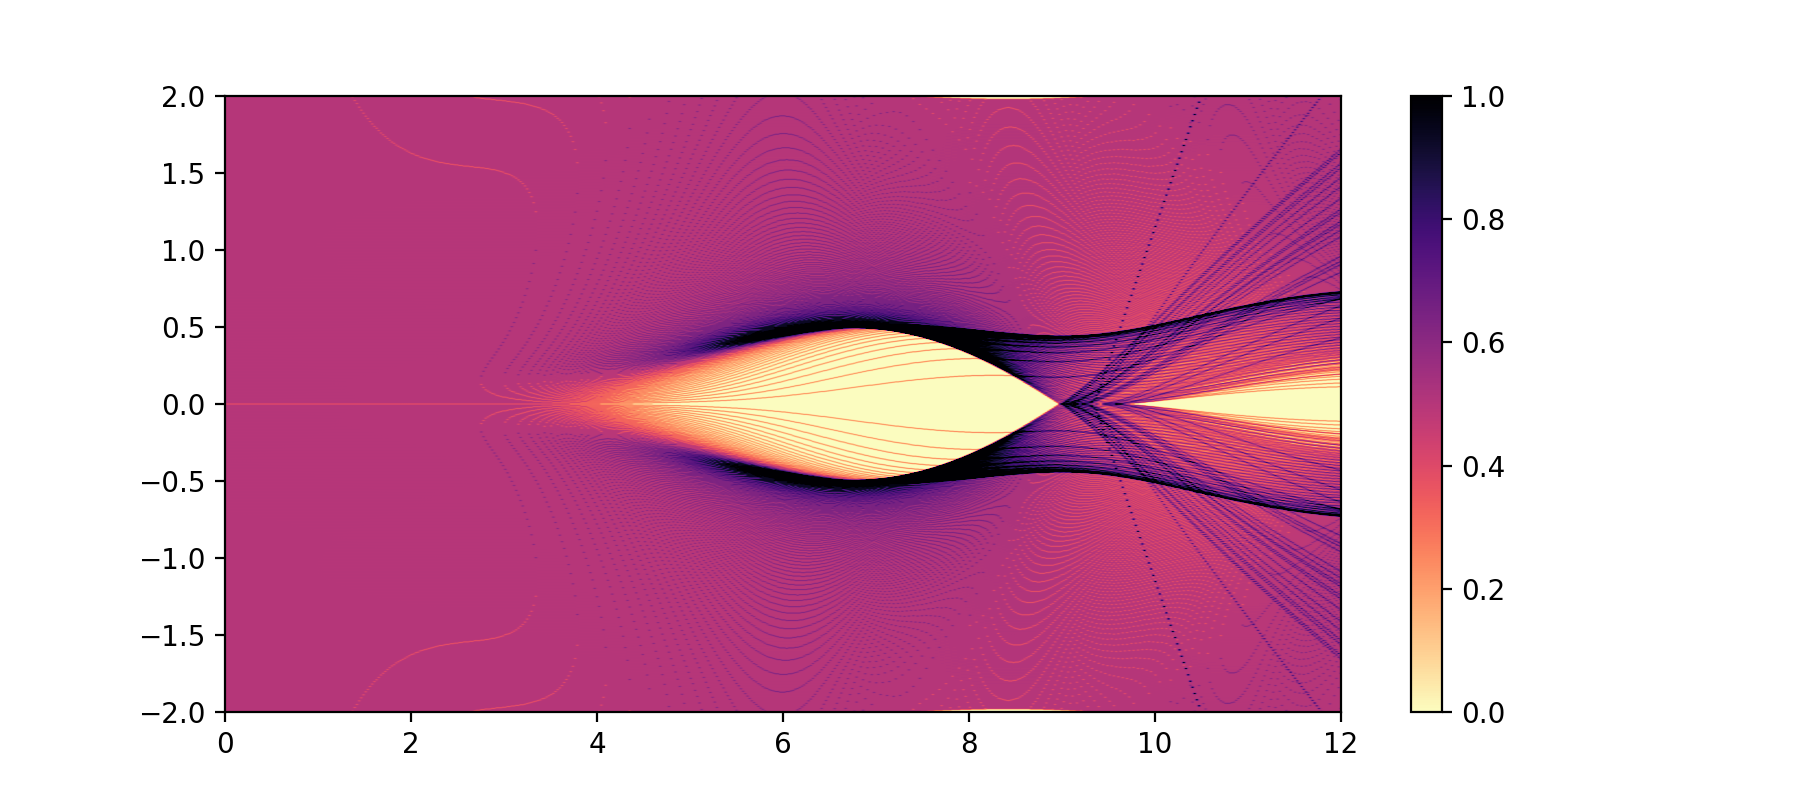

In [4]:
plt.figure(figsize=(9,4))

dens, g_xi, g_r = np.histogram2d(
    (sim.xi[:,None]*np.ones_like(r_xi)).flatten(),
    r_xi.flatten() - 0.5*sim.dr0, weights=n_xi.flatten(), 
    bins=(sim.N_xi, 2*sim.N_r), range=[[0, sim.L_xi],[0, sim.L_r]])

dens_ext = np.hstack((dens[:,::-1], dens))

plt.imshow(dens_ext.T, origin='lower', 
           interpolation='gaussian',
           aspect='auto', cmap=plt.cm.magma_r,
           vmax=1, extent=[0, sim.L_xi, -sim.L_r, sim.L_r ])
plt.colorbar()

<IPython.core.display.Javascript object>


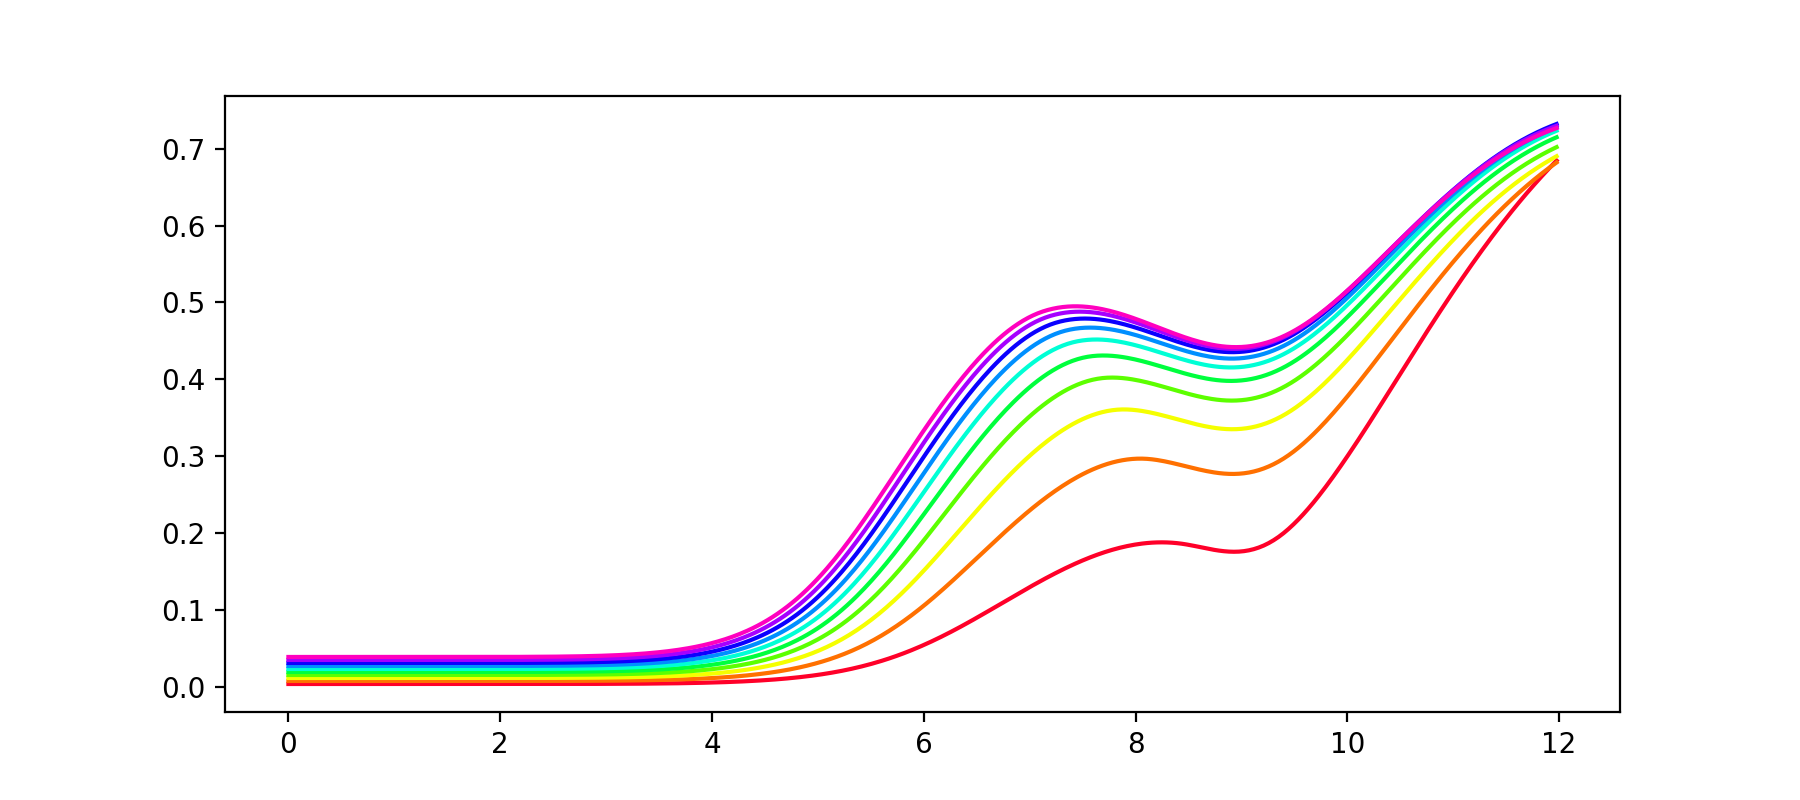

In [5]:
plt.figure(figsize=(9,4))

Nr_plot =  10# sim.N_r

myrainbow = matplotlib.cm.get_cmap('gist_rainbow', Nr_plot)

for j in range(Nr_plot):
    #plt.plot(r_xi[:N_xi][1:, j] - r_xi[:N_xi][-1, j], color=myrainbow(j/Nr_plot))
    plt.plot(sim.xi, r_xi[:, j], color=myrainbow(j/Nr_plot))
    

In [6]:
sim = Simulation(L_xi=30, N_xi=N_xi, L_r=30*R_b, N_r=512)
sim.init_beam(n_b, R_b, ksi0, R_xi)

In [7]:
%%prun

for i_xi in range(N_xi):
    sim.advance_xi(0, correct_Psi=True)